## RBFによる関数近似

Copyright (c) 2022 Tadashi Wadayama  
Released under the MIT license  
https://opensource.org/licenses/mit-license.php

In [11]:
using LinearAlgebra
using Plots
gr()
using Random
Random.seed!(1)
using Flux

In [12]:
δ = 0.05
β = 20.0

20.0

In [13]:
function rbf_func(x, θ)
    rbf(x, β) = exp(-β*x^2)
    s = 0.0
    for i in 1:length(θ)
        s += θ[i]*rbf(x - δ*(i-1)+0.5, β)
    end
    return s
end

rbf_func (generic function with 1 method)

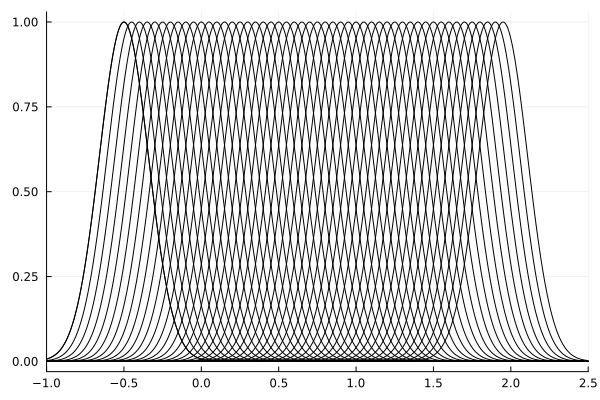

In [14]:
i=1
rbf(x, β) = exp(-β*x^2)
p1 = plot(x->rbf(x - δ*(i-1)+0.5, β), color=:black)
for i in 1:50
    plot!(x->rbf(x - δ*(i-1)+0.5, β), color=:black)
end
plot(p1, xlims=[-1,2.5], legend=false)

In [15]:
savefig("rbf_shape.pdf")

In [16]:
function Fit(T, N, θ)
    dx = T/N
    J = 0.0
    for i in 1:N
        u = rbf_func(i*dx, θ)      
        f = exp(-5*i*dx)*sin(5*i*dx)
        J += (u - f)^2
    end
    return J
end

Fit (generic function with 1 method)

## 学習過程

In [17]:
N = 100
T = 1.0
opt = Flux.ADAM(1.0) 
θ_train = ones(50)
train_itr = 250

function train(T, N, θ)
    ps = Flux.params(θ)
    for i in 1:train_itr
        gs = Flux.gradient(ps) do
            Fit(T, N, θ)
        end
        Flux.Optimise.update!(opt, ps, gs)
        println(Fit(T, N, θ))
    end
end

train (generic function with 1 method)

In [18]:
train(T, N, θ_train)

2.499757847195884
2845.7194053544927
3390.9065418428304
1407.209795087006
52.02235742724381
468.85332362279854
1518.1663475754845
1704.4774130892426
969.6187185454039
183.3729910020935
38.08400969821746
479.47443806186055
894.9071849075935
833.9267830002452
409.5848850755627
50.71627585508377
46.55057749441287
305.8535022453252
501.62938411005143
430.20428115137753
185.55934525815232
12.047824959046428
46.314676320184596
201.4467776936629
285.7267092503713
212.2588889995299
68.7797546130078
0.08288023683491752
52.64598070040726
141.165305825307
157.27335026336866
87.74875057378671
13.223807595283146
7.322335233725471
58.27013698008672
94.40991559238056
72.67958477050931
22.195950193435372
0.13309123454310368
22.549624165704618
52.18297355351367
49.818025808188104
20.4855483417761
0.5193928244411758
9.422003294437085
29.03255608559539
31.402948597439913
14.54020931500332
0.7215083212229729
4.922922131274748
17.167165863168307
19.089604659726877
8.712052504264156
0.3464805127462453
3.416

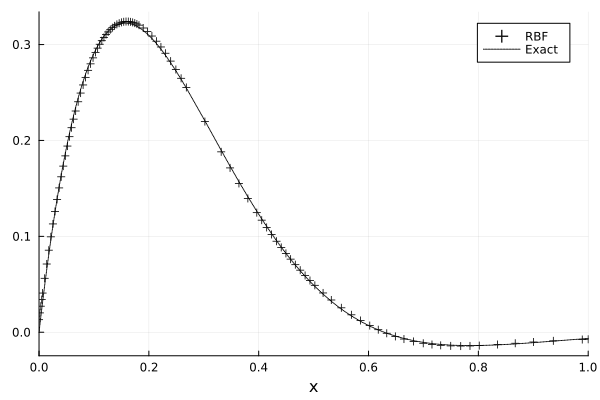

In [19]:
scatter(x->rbf_func(x, θ_train),  lw=1, xlims=[0,1],label="RBF", xlabel="x",color=:black, marker=:+)
plot!(x->exp(-5*x)*sin(5*x), lw=1, label="Exact",color=:black, ls=:dot)

In [20]:
savefig("rbf.pdf")